# Neural network practice

Lets create 2 layer neural network and train it with public dataset

In [1]:
import numpy as np
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
'''
MNIST is simple image open source dataset with 0-9 written digits. Each image has (28,28) shape
'''
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
'''
MNIST properties
'''
print('***** Dataset info ******')
print(mnist_trainset)
print(mnist_testset)
print()
print('***** Single element in the dataset ******')
print(f'X sample is : {mnist_trainset[0][0]}')
print(f'y sample is : {mnist_trainset[0][1]}')

***** Dataset info ******
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

***** Single element in the dataset ******
X sample is : <PIL.Image.Image image mode=L size=28x28 at 0x240C1B06C70>
y sample is : 5


# Visualize

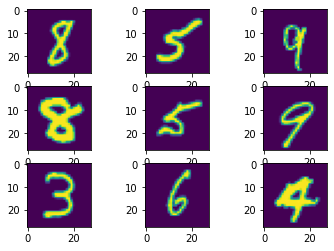

In [4]:
'''
Visualize few images from the dataset
'''
row_number = 3
column_number = 3
inds = np.random.randint(0, 60000, row_number*column_number)
imgs = [mnist_trainset[i][0] for i in inds]
fig, axes = plt.subplots(row_number,column_number)
for i in range(row_number):
    for j in range(column_number):
        axes[i][j].imshow(imgs[i*column_number + j])

In [5]:
'''
Preprocess images to make them numpy arrays for the neural network
'''
def preprocess_images(dataset):
    '''
    param dataset: MNIST dataset
    
    return parameter should be numpy.array
    '''
    X = []
    Y = []
    for img in dataset:
        X.append(np.array(img[0]).flatten())
        Y.append(np.array(img[1]))    
    X = np.array(X)
    Y = np.array(Y)
    return X, Y

X_trainset, y_trainset = preprocess_images(mnist_trainset)
X_test, y_test = preprocess_images(mnist_testset)

In [6]:
# Check if the preprocessing done correct
assert X_trainset.shape == (60000, 784)
assert y_trainset.shape == (60000,)
assert X_test.shape == (10000, 784)
assert y_test.shape == (10000,)

# Define your model

You need to create 2 layer fully connected neural network. Activation function will be ReLU.

In [7]:
from neural_net import TwoLayerNet
from time import time

In [8]:
'''
You need to define your parameters for your network
'''
input_size = 784
hidden_size = 100
output_size = 10

nn_model = TwoLayerNet(input_size, hidden_size, output_size)

# Train model

Below you will start to train your model

In [9]:
'''
'''
def train_val_split(X, y, ratio=0.8):
    '''
    param X: trainset features
    param y: trainset labels
    param ratio: Train-val split ratio
    '''
    X_train, y_train, X_val, y_val = None, None, None, None
    split_idx = int(X.shape[0]*0.8)
    X_train = X[:split_idx, :]
    y_train = y[:split_idx]
    X_val = X[split_idx:, :]
    y_val = y[split_idx:]
    
    return X_train, y_train, X_val, y_val

In [10]:
 X_train, y_train, X_val, y_val = train_val_split(X_trainset, y_trainset)

In [11]:
print(X_train.shape)

(48000, 784)


In [12]:
learning_rate = 1e-4
batch_size = 10
num_iters = 60000

In [13]:
t1 = time()
results = nn_model.train(X_train, y_train, X_val, y_val, learning_rate, batch_size, num_iters)
t2 = time()
print(f'It took {t2-t1} seconds to train model')

Iteration 100 / 60000 : 2.300876419742598
Iteration 200 / 60000 : 2.287941450971063
Iteration 300 / 60000 : 2.174199792624889
Iteration 400 / 60000 : 1.978918990859324
Iteration 500 / 60000 : 1.6521889991026748
Iteration 600 / 60000 : 0.9014500025286148
Iteration 700 / 60000 : 0.791984632456523
Iteration 800 / 60000 : 0.627993019827212
Iteration 900 / 60000 : 0.525372609821008
Iteration 1000 / 60000 : 0.9475116017756424
Iteration 1100 / 60000 : 1.01209547518387
Iteration 1200 / 60000 : 0.7876396606072811
Iteration 1300 / 60000 : 0.365387232560773
Iteration 1400 / 60000 : 0.45340319489541364
Iteration 1500 / 60000 : 0.8491489125179684
Iteration 1600 / 60000 : 0.3932143014081301
Iteration 1700 / 60000 : 0.64112383769479
Iteration 1800 / 60000 : 0.2035156463377896
Iteration 1900 / 60000 : 1.3080719577025703
Iteration 2000 / 60000 : 0.16526159320347747
Iteration 2100 / 60000 : 0.41760752955440616
Iteration 2200 / 60000 : 0.3840013586398393
Iteration 2300 / 60000 : 0.5489909547076302
Iterat

Iteration 18400 / 60000 : 0.24852981311797218
Iteration 18500 / 60000 : 0.10137958107082151
Iteration 18600 / 60000 : 0.19414781114107565
Iteration 18700 / 60000 : 0.1207608465960987
Iteration 18800 / 60000 : 0.0963729474907773
Iteration 18900 / 60000 : 0.24439306744126274
Iteration 19000 / 60000 : 0.2263828238777449
Iteration 19100 / 60000 : 0.4593063170387131
Iteration 19200 / 60000 : 0.15807578977421544
Iteration 19300 / 60000 : 0.5130721443717912
Iteration 19400 / 60000 : 0.37939650721109497
Iteration 19500 / 60000 : 0.23014097805288108
Iteration 19600 / 60000 : 0.28560045186487637
Iteration 19700 / 60000 : 0.2133860080934286
Iteration 19800 / 60000 : 0.2917940071805797
Iteration 19900 / 60000 : 0.11582184555696481
Iteration 20000 / 60000 : 0.3146283753269733
Iteration 20100 / 60000 : 0.1345475382534848
Iteration 20200 / 60000 : 0.1958938854714038
Iteration 20300 / 60000 : 0.15045208877857588
Iteration 20400 / 60000 : 0.20659662210164204
Iteration 20500 / 60000 : 0.1905894398917520

Iteration 36500 / 60000 : 0.16318779527230978
Iteration 36600 / 60000 : 0.1247070159245639
Iteration 36700 / 60000 : 0.3619104065630133
Iteration 36800 / 60000 : 0.12865479842184738
Iteration 36900 / 60000 : 0.27257231812395327
Iteration 37000 / 60000 : 0.21012124408979177
Iteration 37100 / 60000 : 0.4334207660825581
Iteration 37200 / 60000 : 0.24751542204214783
Iteration 37300 / 60000 : 0.15637679752829622
Iteration 37400 / 60000 : 0.29487646147746627
Iteration 37500 / 60000 : 0.1917052836881798
Iteration 37600 / 60000 : 0.16194043111376547
Iteration 37700 / 60000 : 0.1349004403985711
Iteration 37800 / 60000 : 0.17903167478578527
Iteration 37900 / 60000 : 0.14918061845762054
Iteration 38000 / 60000 : 0.13062923633013354
Iteration 38100 / 60000 : 0.1340249484339887
Iteration 38200 / 60000 : 0.1557205128307674
Iteration 38300 / 60000 : 0.6721477760601322
Iteration 38400 / 60000 : 0.1236550175537087
Iteration 38500 / 60000 : 0.2961682655638
Iteration 38600 / 60000 : 0.14614953401790745
I

Iteration 54500 / 60000 : 0.3239631906365158
Iteration 54600 / 60000 : 0.19575378344266556
Iteration 54700 / 60000 : 0.13234199974949645
Iteration 54800 / 60000 : 0.27742027979540956
Iteration 54900 / 60000 : 0.3148651095376544
Iteration 55000 / 60000 : 0.44344832117282773
Iteration 55100 / 60000 : 0.1297221811887476
Iteration 55200 / 60000 : 0.11864558654208747
Iteration 55300 / 60000 : 0.528631573299816
Iteration 55400 / 60000 : 0.14561272677809622
Iteration 55500 / 60000 : 0.116564159632588
Iteration 55600 / 60000 : 0.597936084117485
Iteration 55700 / 60000 : 0.11087615045418567
Iteration 55800 / 60000 : 0.6000226207695083
Iteration 55900 / 60000 : 0.38794052426872955
Iteration 56000 / 60000 : 0.2700016109582565
Iteration 56100 / 60000 : 0.1364962731802801
Iteration 56200 / 60000 : 0.19893221065939853
Iteration 56300 / 60000 : 0.14554016829135463
Iteration 56400 / 60000 : 0.11800633866058523
Iteration 56500 / 60000 : 0.24340929227140634
Iteration 56600 / 60000 : 0.11864669222008621


# Results

Lets plot loss, train accuracy and validation accuracy

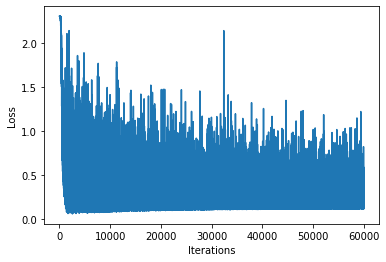

In [14]:
plt.plot(np.arange(len(results['loss_history'])), results['loss_history'])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

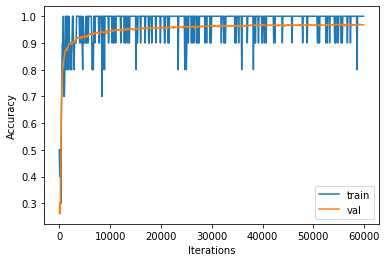

In [15]:
plt.plot(np.arange(len(results['train_acc_history']))*100, results['train_acc_history'],label='train')
plt.plot(np.arange(len(results['val_acc_history']))*100, results['val_acc_history'], label='val')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Test model

Finally we can test trained model on test dataset

In [16]:
y_pred = nn_model.predict(X_test)
test_acc = (y_pred == y_test).mean()*100
print(f'Your model test accuracy is : {test_acc}%')

Your model test accuracy is : 96.86%
